In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [2]:
# Getting Files Situated
data_file = "base_data_air_mobility_and_fall_stuff.csv"
char_attributes = pd.read_csv(data_file)
# data_file = "conceptualizing_grounded_movement - horizontal_movement_attributes.csv"
# data_file_path = "datasets/{}".format(data_file)
# char_attributes = pd.read_csv(data_file_path)



# # Adjust the Percentage Format of "Speed Increase" to be a Float
# char_attributes['Speed Increase'] = char_attributes['Speed Increase'].str.rstrip('%').astype(float)/100.0

# # Average Speed ( Avg of Regular and Fast Fall Speeds )
# char_attributes["Average Falling Speed"] = (char_attributes["Regular Falling Speed"] + char_attributes["Fast Falling Speed"])/2

In [3]:
char_attributes.head(5)

,character,air_mobility_a,air_mobility_b,air_speed,air_friction,weight,gravity,terminal_velocity
0,Bowser,0.030,0.02,0.80,0.010,117,0.130,1.9
1,Captain Falcon,0.040,0.02,1.12,0.010,104,0.130,2.9
2,Donkey Kong,0.020,0.02,1.00,0.020,114,0.100,2.4
3,Dr Mario,0.024,0.02,0.90,0.016,100,0.095,1.7
4,Falco,0.050,0.02,0.83,0.020,80,0.170,3.1


In [4]:
# Normalize wrt Columns via Z-Scoring
from scipy.stats import zscore
z_labels = []

for name in char_attributes.iloc[:,1:].columns:
    z_labels.append(  "Z_{}".format(name)   )

char_attributes[z_labels] = char_attributes.iloc[:,1:].apply(zscore)

char_attributes.head()

,character,air_mobility_a,air_mobility_b,air_speed,air_friction,weight,gravity,terminal_velocity,Z_air_mobility_a,Z_air_mobility_b,Z_air_speed,Z_air_friction,Z_weight,Z_gravity,Z_terminal_velocity
0,Bowser,0.030,0.02,0.80,0.010,117,0.130,1.9,-0.430433,-0.168991,-0.831298,-0.528828,1.641298,0.728191,-0.104299
1,Captain Falcon,0.040,0.02,1.12,0.010,104,0.130,2.9,0.229818,-0.168991,1.202938,-0.528828,0.851044,0.728191,2.065123
2,Donkey Kong,0.020,0.02,1.00,0.020,114,0.100,2.4,-1.090684,-0.168991,0.440099,0.406514,1.458932,-0.146985,0.980412
3,Dr Mario,0.024,0.02,0.90,0.016,100,0.095,1.7,-0.826584,-0.168991,-0.195600,0.032377,0.607888,-0.292847,-0.538183
4,Falco,0.050,0.02,0.83,0.020,80,0.170,3.1,0.890069,-0.168991,-0.640589,0.406514,-0.607888,1.895093,2.499007


In [5]:
# # Normalize wrt Columns via Z-Scoring

# from scipy.stats import zscore
# char_attributes[["Z_Regular_Falling_Speed","Z_Fast_Falling_Speed","Z_Gravity","Z_Speed_Increase","Z_Weight","Z_Average_Falling_Speed"]] = char_attributes.iloc[:,1:7].apply(zscore)

# char_attributes.head()

In [6]:
# char_attributes.to_csv("SSBM_NTSC_Fall_Speeds_Gravity_Weight_With_Respective_Z_Score_Normalizations.csv")

In [7]:
# Before clustering, setup label list from the Character variable
labelList = list(char_attributes["character"].unique())
labelList[:5]

['Bowser', 'Captain Falcon', 'Donkey Kong', 'Dr Mario', 'Falco']

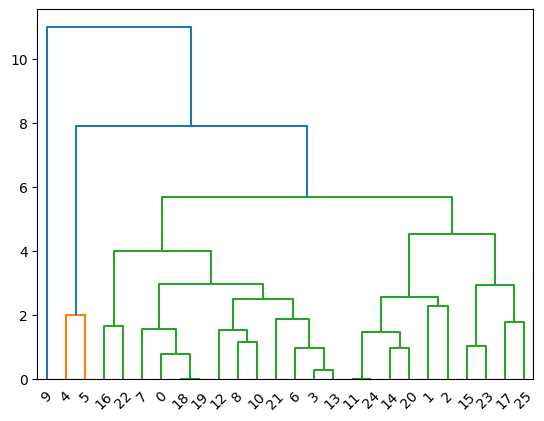

In [8]:
# Create linkage method using Ward's method
link_method = linkage(char_attributes[["Z_air_mobility_a","Z_air_mobility_b","Z_air_speed","Z_air_friction","Z_gravity","Z_terminal_velocity"]], method = 'ward')

# Generate & Visualize the dendrogram
dend = dendrogram(link_method
                  #,labels = labelList
                  #,truncate_mode='lastp'
                  #,p=10
                 )

In [9]:
# Method 1: criterion = 'maxclust' where a cut is defined based on the number of clusters
clusters_max = fcluster(link_method, 4, criterion='maxclust') 
#clusters_max

# Method 2: criterion='distance' where a cut is defined based on distance in the y-axis
clusters_dist = fcluster(link_method, 1.5, criterion='distance')
#clusters_dist

#Apply the clusters back to the dataset
char_attributes['HCluster_max'] = clusters_max
char_attributes['HCluster_dist'] = clusters_dist
# df['HCluster_dist'] = clusters_dist
char_attributes.head()

,character,air_mobility_a,air_mobility_b,air_speed,air_friction,weight,gravity,terminal_velocity,Z_air_mobility_a,Z_air_mobility_b,Z_air_speed,Z_air_friction,Z_weight,Z_gravity,Z_terminal_velocity,HCluster_max,HCluster_dist
0,Bowser,0.030,0.02,0.80,0.010,117,0.130,1.9,-0.430433,-0.168991,-0.831298,-0.528828,1.641298,0.728191,-0.104299,2,5
1,Captain Falcon,0.040,0.02,1.12,0.010,104,0.130,2.9,0.229818,-0.168991,1.202938,-0.528828,0.851044,0.728191,2.065123,3,12
2,Donkey Kong,0.020,0.02,1.00,0.020,114,0.100,2.4,-1.090684,-0.168991,0.440099,0.406514,1.458932,-0.146985,0.980412,3,13
3,Dr Mario,0.024,0.02,0.90,0.016,100,0.095,1.7,-0.826584,-0.168991,-0.195600,0.032377,0.607888,-0.292847,-0.538183,2,9
4,Falco,0.050,0.02,0.83,0.020,80,0.170,3.1,0.890069,-0.168991,-0.640589,0.406514,-0.607888,1.895093,2.499007,1,1


In [10]:
# Analyze Data in Terms of HClusters
# Cluster_Max
aggdata_max =char_attributes.iloc[:,1:].groupby('HCluster_max').mean()
aggdata_max['Frequency']=char_attributes.HCluster_max.value_counts().sort_index()
aggdata_max

,air_mobility_a,air_mobility_b,air_speed,air_friction,weight,gravity,terminal_velocity,Z_air_mobility_a,Z_air_mobility_b,Z_air_speed,Z_air_friction,Z_weight,Z_gravity,Z_terminal_velocity,HCluster_dist,Frequency
HCluster_max,,,,,,,,,,,,,,,,
1,0.055000,0.020000,0.830000,0.020000,77.500000,0.200000,2.950000,1.220195,-0.168991,-0.640589,0.406514,-0.759860,2.770269,2.173594,1.500000,2
2,0.030269,0.019615,0.832308,0.017538,90.230769,0.099231,1.766154,-0.412657,-0.180645,-0.625919,0.176276,0.014028,-0.169425,-0.394668,6.692308,13
3,0.035600,0.018000,1.037000,0.008900,95.200000,0.097700,2.049000,-0.060692,-0.229594,0.675308,-0.631716,0.316102,-0.214082,0.218945,12.800000,10
4,0.090000,0.190000,1.350000,0.050000,60.000000,0.064000,1.300000,3.531073,4.982311,2.665045,3.212542,-1.823665,-1.197196,-1.405952,17.000000,1


In [11]:
# # Analyze Data in Terms of HClusters
# # Cluster_Max
# aggdata_max =char_attributes.iloc[:,1:].groupby('HCluster_dist').mean()
# aggdata_max['Frequency']=char_attributes.HCluster_dist.value_counts().sort_index()
# aggdata_max

In [12]:
# for clst in range(1,1+len(char_attributes["HCluster_max"].unique())):
#     print(char_attributes[char_attributes["HCluster_max"]==clst][["Character"]])

for clst in range(1,1+len(char_attributes["HCluster_dist"].unique())):
    print(char_attributes[char_attributes["HCluster_dist"]==clst][["character"]])

  character
4     Falco
  character
5       Fox
   character
16      Ness
   character
22     Sheik
   character
0     Bowser
18     Pichu
19   Pikachu
   character
7  Ganondorf
       character
8   Ice Climbers
10         Kirby
   character
12     Luigi
       character
3       Dr Mario
6   Game & Watch
13         Mario
   character
21     Samus
     character
11        Link
14       Marth
20         Roy
24  Young Link
        character
1  Captain Falcon
     character
2  Donkey Kong
   character
15    Mewtwo
23     Yoshi
   character
17     Peach
   character
25     Zelda
    character
9  Jigglypuff


In [13]:
# # Analyze Data in Terms of HClusters
# # Cluster_Max
# aggdata_max =char_attributes[["Character","Weight","Gravity","Z_Weight","Z_Gravity","HCluster_dist"]].groupby('HCluster_dist').mean()
# aggdata_max['Amount']=char_attributes.HCluster_max.value_counts().sort_index()
# aggdata_max

In [14]:
char_attributes["HClusters_based_on_Max"] = char_attributes["HCluster_max"].apply(str)


fig = px.scatter_3d(char_attributes,
                    x='Z_dash_and_run_terminal_velocity',
                    y='Z_traction_times_js',
                    z='Z_dash_initial_velocity',
                    color='HClusters_based_on_Max',
                    opacity=0.7,
                    hover_data=["character"])
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['character', 'air_mobility_a', 'air_mobility_b', 'air_speed', 'air_friction', 'weight', 'gravity', 'terminal_velocity', 'Z_air_mobility_a', 'Z_air_mobility_b', 'Z_air_speed', 'Z_air_friction', 'Z_weight', 'Z_gravity', 'Z_terminal_velocity', 'HCluster_max', 'HCluster_dist', 'HClusters_based_on_Max'] but received: Z_dash_and_run_terminal_velocity

In [ ]:
# for clst in range(1,1+len(char_attributes["HCluster_dist"].unique())):
#     print(char_attributes[char_attributes["HCluster_dist"]==clst][["Character","Regular Falling Speed","Weight"]])

In [ ]:
# char_attributes

In [ ]:
char_attributes["HClusters_based_on_Dist"] = char_attributes["HCluster_dist"].apply(str)

sns.jointplot(data=char_attributes,
              x="Z_Regular_Falling_Speed",
              y="Z_Weight",
              hue="HClusters_based_on_Dist",
              palette="Set2"
             )

In [ ]:
new_labels = ["Bulky","Awkward_Heavies", "Samus","Slightly Light Floaties", "Kirby","Pika","Feathers","Puff", "Mids","Fast_Fallers","Falcon"]

char_attributes["HCluster"] = char_attributes["HCluster_max"]

i = 1
for label in new_labels:
    print(i,label)
    char_attributes["HCluster"] = char_attributes["HCluster"].replace(i,label)
    i+=1

In [ ]:
clst = 3
char_attributes[char_attributes["HCluster_max"]==clst]

In [ ]:
g = sns.JointGrid(data=char_attributes, x="Z_Weight", y="Z_Gravity", hue="HClusters_based_on_Max")
g.plot(sns.scatterplot, sns.histplot)

# Add Distribution Lines
temp_x = -1.5
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

temp_x = 0
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

temp_x = 1.5
g.refline(x=temp_x, y=-1.5)
g.refline(x=temp_x, y=0)
g.refline(x=temp_x, y=1.5)

In [ ]:
char_attributes["HClusters_based_on_Max"] = char_attributes["HCluster_max"].apply(str)

sns.jointplot(data=char_attributes, x="Regular Falling Speed", y="Weight", hue="HClusters_based_on_Max");

In [ ]:
sns.jointplot(data=char_attributes, x="Regular Falling Speed", y="Fast Falling Speed", kind="reg");

In [ ]:
sns.jointplot(data=char_attributes, x="Gravity", y="Speed Increase", kind="reg");

In [ ]:
char_attributes.iloc[:,1:7]

In [ ]:
char_attributes[["Character","Regular Falling Speed","Fast Falling Speed"]]

In [ ]:
char_attributes